In [13]:
def dist(x:list,y:list)->float:
    pass
    d=0
    for i,j in x,y:
        # print(i,j)
        d+=abs(i-j)
    return d

dist([0,2],[0,1])

3

In [ ]:
def dist_mat_(points):
    n=len(points)
    dist_mat=[ [None]*n for _ in points ]

    for i in range(n):
        for j in range(n):
            dist_mat[i][j] = dist(points[i],points[j])

    return dist_mat

DBSCAN using Library (iris data)

In [1]:
from sklearn.cluster import DBSCAN # type: ignore
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
# iris = pd.DataFrame( load_iris().data,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
data = load_iris().data 

# data = np.ndarray( [[1,2],[2,1],[2,2],[1,1.5],[2,1.5],[4,5],[2,0.5],[2.3,1],[1,1.1]])

type(data)

numpy.ndarray

In [3]:
dbscan = DBSCAN(eps=3,min_samples=4)
dbscan.fit(data)

DBSCAN(eps=3, min_samples=4)

In [4]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
labels = dbscan.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

border_samples_mask = np.logical_and(~core_samples_mask, labels != -1)

outlier_samples_mask = labels == -1

# Step 4: Count core, border, and outlier points
core_points = np.sum(core_samples_mask)
border_points = np.sum(border_samples_mask)
outlier_points = np.sum(outlier_samples_mask)

In [6]:
core_points,border_points,outlier_points

(np.int64(150), np.int64(0), np.int64(0))

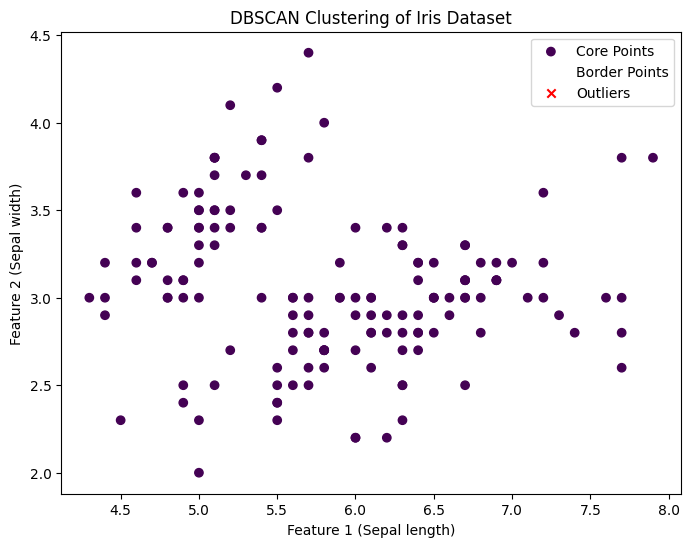

In [7]:
import matplotlib.pyplot as plt

# Step 5: Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the core points
plt.scatter(data[core_samples_mask, 0], data[core_samples_mask, 1], c=labels[core_samples_mask], cmap='viridis', marker='o', label='Core Points')

# Plot the border points
plt.scatter(data[border_samples_mask, 0], data[border_samples_mask, 1], c=labels[border_samples_mask], cmap='viridis', marker='^', label='Border Points')

# Plot the outliers
plt.scatter(data[outlier_samples_mask, 0], data[outlier_samples_mask, 1], c='red', marker='x', label='Outliers')

plt.title('DBSCAN Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Sepal length)')
plt.ylabel('Feature 2 (Sepal width)')
plt.legend()
plt.show()